## Observations and Insights

## Dependencies and starter code

In [26]:
# Dependencies and Setup

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data=pd.merge(mouse_metadata,study_results,on="Mouse ID")
data.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_table=data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean","median","var","std","sem"])
stat_table




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

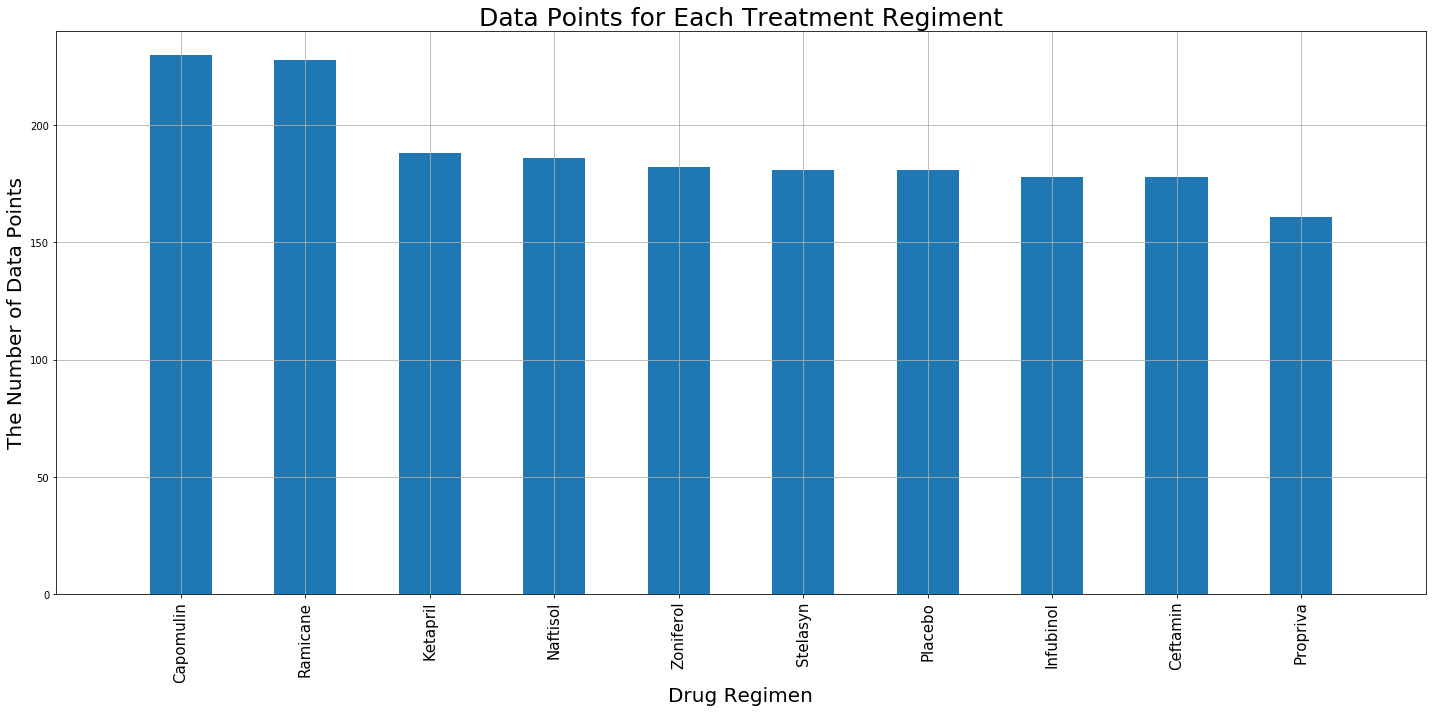

In [28]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points=data.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
pandas_bar=data_points.plot(kind="bar",figsize=(20,10))
plt.title("Data Points for Each Treatment Regiment",fontSize=25)
plt.xticks(fontSize=15)
plt.xlabel("Drug Regimen",fontSize=20)
plt.ylabel("The Number of Data Points",fontSize=20)
plt.xlim(-1,len(data_points))
plt.ylim(0,max(data_points)+10)
plt.grid()
plt.tight_layout()
plt.show()



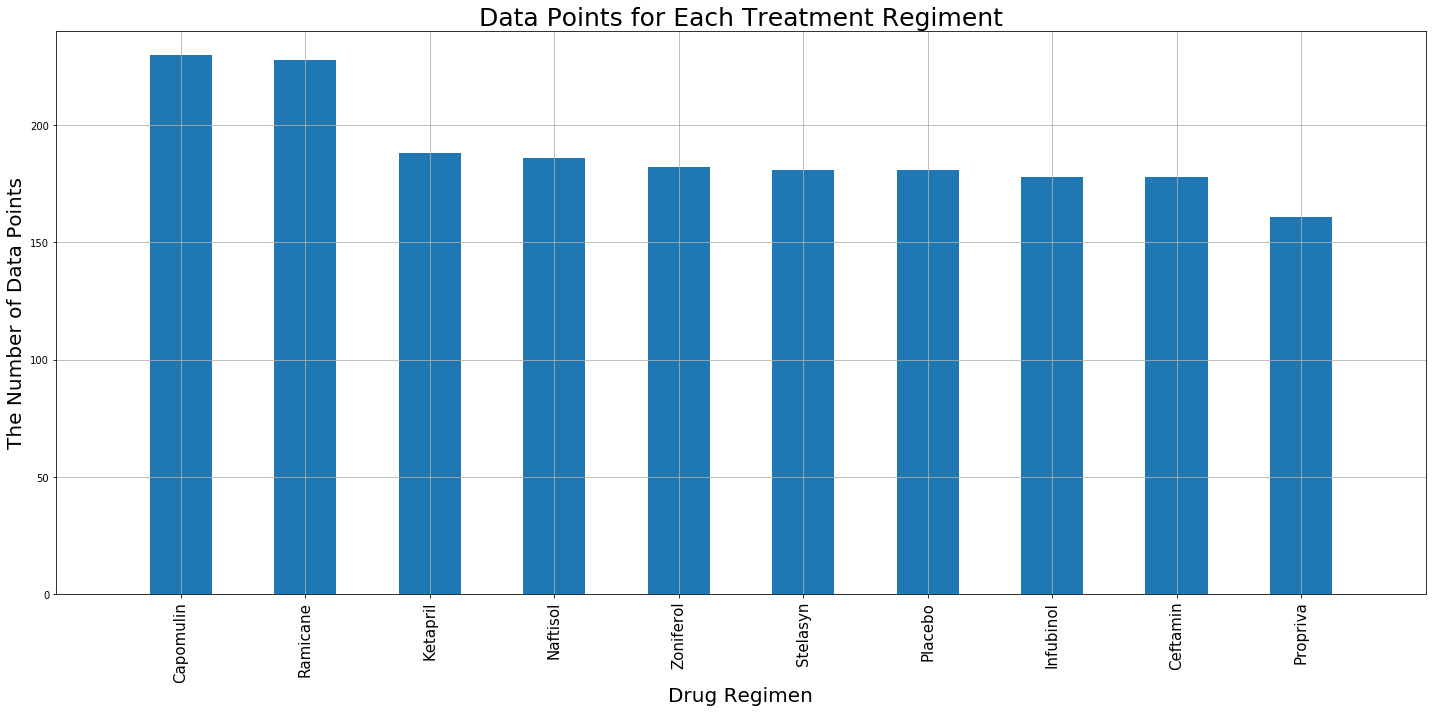

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=np.arange(len(data_points))
plt.figure(figsize=(20,10))
plt.bar(x_axis,data_points, width=0.5)
tick_location=[value for value in x_axis]
plt.xticks(tick_location,data_points.keys(),rotation ="vertical")
plt.title("Data Points for Each Treatment Regiment",fontSize=25)
plt.xlim(-1,len(x_axis))
plt.ylim(0,max(data_points)+10)
plt.xticks(fontSize=15)
plt.xlabel("Drug Regimen",fontSize=20)
plt.ylabel("The Number of Data Points",fontSize=20)
plt.grid()
plt.tight_layout()
plt.show()



## Pie plots

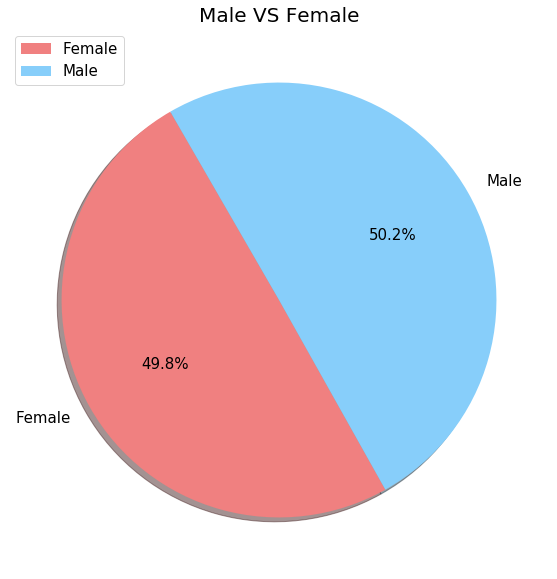

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex=mouse_metadata.groupby(["Sex"])["Mouse ID"].count()
pandas_pie=sex.plot(kind="pie",figsize=(20,10),autopct="%1.1f%%",shadow=True,startangle=120,fontsize=15,colors=["lightcoral", "lightskyblue"])
pandas_pie.set_ylabel('')
plt.title("Male VS Female", fontsize=20)
plt.legend(["Female","Male"],fontsize=15)
plt.show()

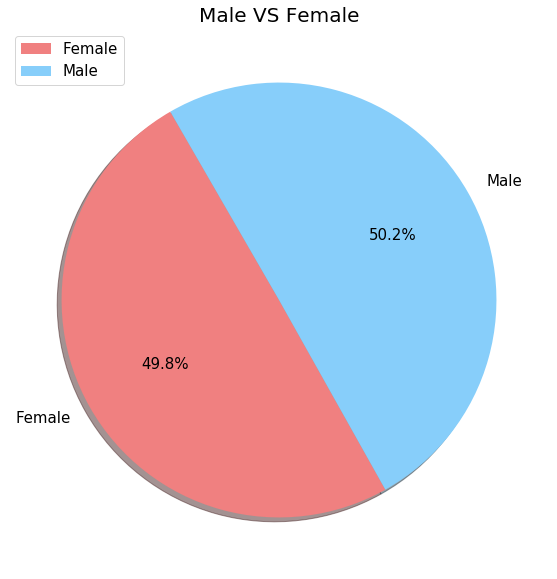

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(111)
ax.pie(sex,labels=sex.index,autopct="%1.1f%%",shadow=True,startangle=120,colors=["lightcoral", "lightskyblue"],textprops={'fontsize': 15})
ax.set_title("Male VS Female", fontsize=20)
ax.legend(["Female","Male"],fontsize=15)
plt.show()

## Quartiles, outliers and boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
df=data.loc[data["Drug Regimen"].isin(["Capomulin","Ramicane", "Infubinol","Ceftamin"]),["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
final_tumor=df.groupby(["Drug Regimen","Mouse ID"],as_index=False).agg({"Timepoint":"max"})
final_df=df.merge(final_tumor, on=("Drug Regimen","Mouse ID","Timepoint"))


#Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap=final_df[final_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
qur_cap=cap.quantile([.25,.5,.75])                                                               
lowerqcap=qur_cap[0.25]
upperqcap=qur_cap[0.75]
iqr_cap=upperqcap-lowerqcap
lower_bound = lowerqcap - (1.5*iqr_cap)
upper_bound = upperqcap + (1.5*iqr_cap)
upper_bound

ram=final_df[final_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
qur_ram=ram.quantile([.25,.5,.75])                                                               
lowerqram=qur_ram[0.25]
upperqram=qur_ram[0.75]
iqr_ram=upperqram-lowerqram
lower_bound = lowerqram - (1.5*iqr_ram)
upper_bound = upperqram + (1.5*iqr_ram)
upper_bound

inf=final_df[final_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
qur_inf=inf.quantile([.25,.5,.75])                                                               
lowerqinf=qur_inf[0.25]
upperqinf=qur_inf[0.75]
iqr_inf=upperqinf-lowerqinf
lower_bound = lowerqinf - (1.5*iqr_inf)
upper_bound = upperqinf + (1.5*iqr_inf)
upper_bound

cef=final_df[final_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
qur_cef=cef.quantile([.25,.5,.75])                                                               
lowerqcef=qur_cef[0.25]
upperqcef=qur_cef[0.75]
iqr_cef=upperqcef-lowerqcef
lower_bound = lowerqcef - (1.5*iqr_cef)
upper_bound = upperqcef + (1.5*iqr_cef)
upper_bound

tumor_outliers=pd.DataFrame
#capomulin

print(cap)
print(ram)

1     23.343598
2     28.484033
3     28.430964
6     30.485985
10    31.023923
12    31.896238
13    32.377357
14    33.329098
16    34.455298
20    37.311846
22    36.041047
24    37.074024
28    38.846876
30    38.939633
31    38.982878
32    38.753265
34    38.125164
35    39.952347
36    40.658124
37    40.159220
38    40.728578
39    41.483008
40    41.581521
45    47.685963
82    46.539206
Name: Tumor Volume (mm3), dtype: float64
0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
26    36.561652
27    37.311236
29    38.342008
33    38.407618
41    40.659006
42    40.667713
43    45.220869
44    43.047543
46    43.419381
47    43.166373
48    44.183451
Name: Tumor Volume (mm3), dtype: float64


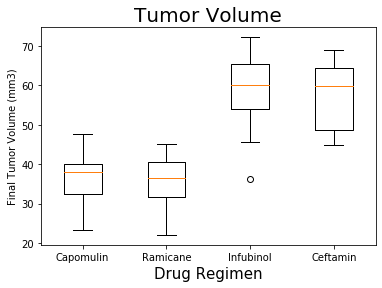

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot=[cap,ram,inf,cef]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume',fontSize=20)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen',fontSize=15)

ax1.boxplot(box_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])

plt.savefig('boxplot')
plt.show()

## Line and scatter plots

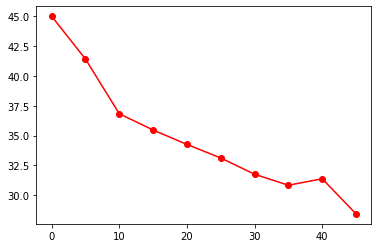

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

single_mouse=data[(data["Mouse ID"]=="m601") & (data["Drug Regimen"]=="Capomulin")]
single_mouse

x_axis=single_mouse["Timepoint"]
y_axis=single_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis,marker="o", color="red")
plt.show()


# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

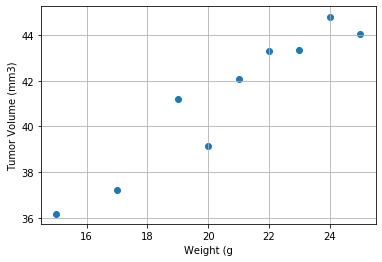

In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

tumor_weight=data[data["Drug Regimen"]=="Capomulin"]
tumor_weight

aver_weight=tumor_weight.groupby("Weight (g)",as_index=False)["Tumor Volume (mm3)"].mean()

x_axis=aver_weight["Weight (g)"]
y_axis=aver_weight["Tumor Volume (mm3)"]


plt.scatter(x_axis,y_axis)
plt.xlabel('Weight (g')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()


Corellation coefficient is 0.950524396185527


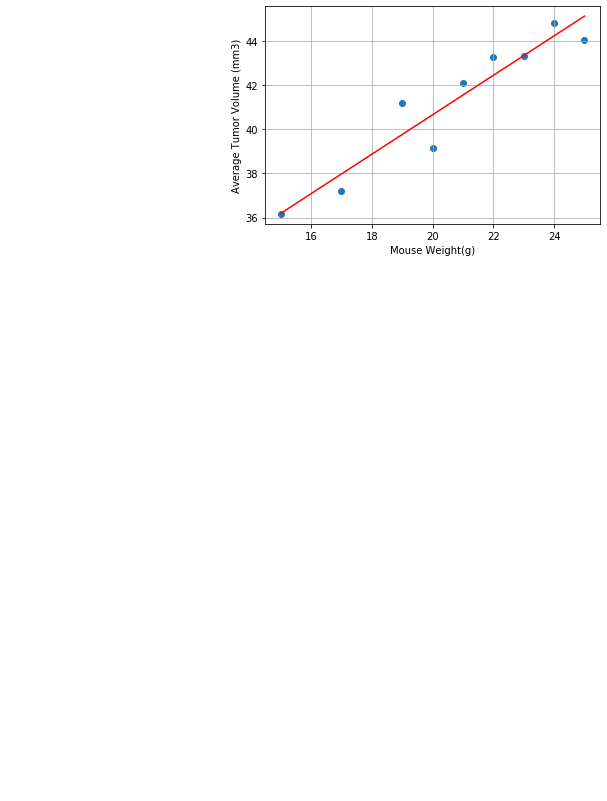

In [45]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_axis=aver_weight["Weight (g)"]
y_axis=aver_weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
print(f"Corellation coefficient is {rvalue}")
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

